In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from final.solution import cast_line_elements

In [18]:
# FIN = "data/01_head100.txt"
FIN = "data/01"
with open(FIN, "r") as fin:
    lines= fin.readlines()

# subset of rows to fit into memory
lines = lines[:500]

Extract the number of targets, categoricals and floats

In [19]:

T, C, F = cast_line_elements(lines[0], int)
cols_t = [f"T{i}" for i in range(T)]
cols_c = [f"C{i}" for i in range(C)]
cols_f = [f"F{i}" for i in range(F)]

Transform the data into a dataframe casting appropreate types

In [4]:
df = pd.Series(lines[5:]).map(lambda s: s.strip().split()).apply(pd.Series)
df.columns = cols_t + cols_c + cols_f
# every 10'000-th row is just a separator and will lead to weird rows in DF
df = df.dropna()
# ensure proper types
dtypes = {col: np.uint16 for col in cols_c+cols_t}
dtypes.update({col: np.float32 for col in cols_f})
df = df.astype(dtypes)

# separation of targets and features
X = df.iloc[:,T:]
y = df.iloc[:,:T]

In [14]:
for col_c in cols_c:
    for col_t in cols_t:
        display(df.groupby(col_c)[col_t].mean().sort_values(ascending=False).head(3))

C0
1    0.014580
2    0.012598
5    0.004348
Name: T0, dtype: float64

C0
0    0.023001
2    0.000188
3    0.000095
Name: T1, dtype: float64

C0
0    0.007386
5    0.004348
2    0.000846
Name: T2, dtype: float64

C1
24    0.200000
3     0.041758
5     0.010753
Name: T0, dtype: float64

C1
4     0.089685
13    0.054645
11    0.010274
Name: T1, dtype: float64

C1
8     0.066667
22    0.059524
1     0.008722
Name: T2, dtype: float64

C2
28    0.326087
23    0.015267
2     0.010643
Name: T0, dtype: float64

C2
40    0.125000
10    0.119444
1     0.030669
Name: T1, dtype: float64

C2
18    0.021622
3     0.015587
23    0.003817
Name: T2, dtype: float64

C3
1    0.009478
2    0.007483
3    0.006410
Name: T0, dtype: float64

C3
1    0.010002
2    0.007143
0    0.004967
Name: T1, dtype: float64

C3
1    0.003823
2    0.003628
0    0.001041
Name: T2, dtype: float64

In [22]:
X.describe()

,C0,C1,C2,C3,F0,F1,F2,F3,F4,F5,...,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39
count,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,...,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000,49991.000000
mean,1.516513,3.327039,5.614391,0.791042,-0.039929,0.133259,-0.183929,-0.206304,-0.176007,-0.088586,...,0.191345,-0.140815,0.121007,0.039696,-0.178334,-0.221728,0.119030,-0.046311,0.043844,-0.111465
std,1.488289,4.083506,9.513095,0.794047,0.059000,0.056626,0.054814,0.057182,0.062944,0.060710,...,0.055451,0.055516,0.057273,0.058379,0.056255,0.056643,0.057565,0.057921,0.061112,0.061188
min,0.000000,0.000000,0.000000,0.000000,-0.280913,-0.110125,-0.420056,-0.500195,-0.404233,-0.341493,...,-0.074427,-0.421731,-0.177438,-0.217398,-0.400903,-0.479079,-0.142627,-0.336353,-0.221567,-0.363703
25%,0.000000,0.000000,0.000000,0.000000,-0.080089,0.096479,-0.221051,-0.241690,-0.217936,-0.131397,...,0.156168,-0.177754,0.084843,0.004528,-0.215764,-0.258712,0.081772,-0.084130,0.004000,-0.152776
50%,1.000000,2.000000,1.000000,1.000000,-0.039761,0.134373,-0.186362,-0.204955,-0.178769,-0.089328,...,0.190656,-0.140058,0.121723,0.039585,-0.181509,-0.223401,0.119178,-0.045565,0.043573,-0.113658
75%,2.000000,5.000000,7.000000,1.000000,0.000502,0.171953,-0.152448,-0.170127,-0.134924,-0.045302,...,0.228609,-0.102853,0.159655,0.076708,-0.143888,-0.183661,0.155583,-0.009423,0.084028,-0.073735
max,13.000000,24.000000,67.000000,3.000000,0.211246,0.352586,0.090489,0.075728,0.106844,0.167910,...,0.407175,0.095775,0.347307,0.288957,0.098288,0.058421,0.345802,0.281074,0.318011,0.203152


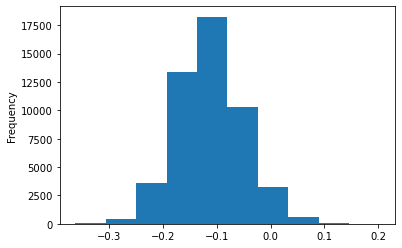

In [26]:
X['F39'].plot.hist()